In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

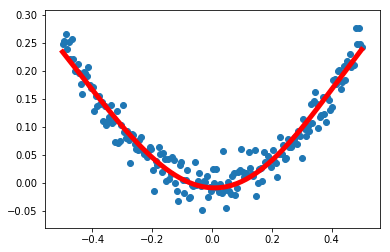

In [4]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis] #linspace()通过指定开始值、终值和元素个数创建表示等差数列的一维数组，可以通过endpoint参数指定是否包含终值，默认值为True，即包含终值。
#通过newaxis添加新的维度，添加后维度变成200×1 https://blog.csdn.net/xtingjie/article/details/72510834
# numpy.linspace使用详解 https://blog.csdn.net/you_are_my_dream/article/details/53493752
noise = np.random.normal(0,0.02,x_data.shape) #正态分布 https://blog.csdn.net/lanchunhui/article/details/50163669  
y_data = np.square(x_data) + noise

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1]) #行不确定，列为 1
y = tf.placeholder(tf.float32,[None,1]) #占位符

#构建输入层一个神经元，中间层十个神经元，输出层一个神经元的神经网络
#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))  #因为此权值连接输入层和中间层，所以生成1行10列的随机数
#tensorflow生成随机数 tf.random_normal 和 tf.random_uniform 和 tf.truncated_normal 和 tf.random_shuffle  https://blog.csdn.net/tz_zs/article/details/75948350
biases_L1 = tf.Variable(tf.zeros([1,10])) #生成偏度值变量
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1 #得到中间层信号的总和
L1 = tf.nn.tanh(Wx_plus_b_L1) #L1相当于中间层的输出，使用双曲正切函数作为激活函数
#激活函数（Activation Function），就是在人工神经网络的神经元上运行的函数，负责将神经元的输入映射到输出端。https://blog.csdn.net/u011584941/article/details/71534828

#定义神经网络的输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1])) #因为此权值连接中间层和输出层，所以生成10行1列的随机数
biases_L2 = tf.Variable(tf.zeros([1,1])) #生成偏度值变量
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2 #得到输出层信号的总和
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction))
#使用梯度下降算法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict = {x:x_data,y:y_data})
        
    #获得预测值
    prediction_value = sess.run(prediction, feed_dict = {x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5) #‘r-’代表红色实线，lw代表宽度
    plt.show()
    